Chapter 23  
# PCA of Interest Rate Changes
*Machine Learning Made Easy and Visual with Python*

## Initialization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [5]:
X_df = pd.read_pickle('X_df.pkl')

In [6]:
X_df

,0.5 yr,1 yr,2 yr,5 yr,7 yr,10 yr,20 yr,30 yr
DATE,,,,,,,,
2022-01-04,0.000000,-0.050000,-0.012821,0.000000,0.012903,0.018405,0.024390,0.029851
2022-01-05,0.000000,0.078947,0.077922,0.043796,0.031847,0.030120,0.009524,0.009662
2022-01-06,0.045455,0.097561,0.060241,0.027972,0.024691,0.011696,0.000000,0.000000
2022-01-07,0.043478,-0.044444,-0.011364,0.020408,0.018072,0.017341,0.014151,0.009569
2022-01-10,0.166667,0.069767,0.057471,0.020000,0.011834,0.011364,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2022-12-23,0.002146,0.004310,0.016509,0.018470,0.015915,0.021798,0.020460,0.024129
2022-12-27,0.019272,0.019313,0.002320,0.020725,0.026110,0.024000,0.027569,0.028796
2022-12-28,-0.002101,-0.008421,-0.002315,0.007614,0.010178,0.010417,0.007317,0.012723


In [7]:
len(X_df)

248

## Visualize the raw data

In [9]:
# Set a unified y-axis range: find the overall min and max values in X_df
y_min = X_df.min().min()
y_max = X_df.max().max()

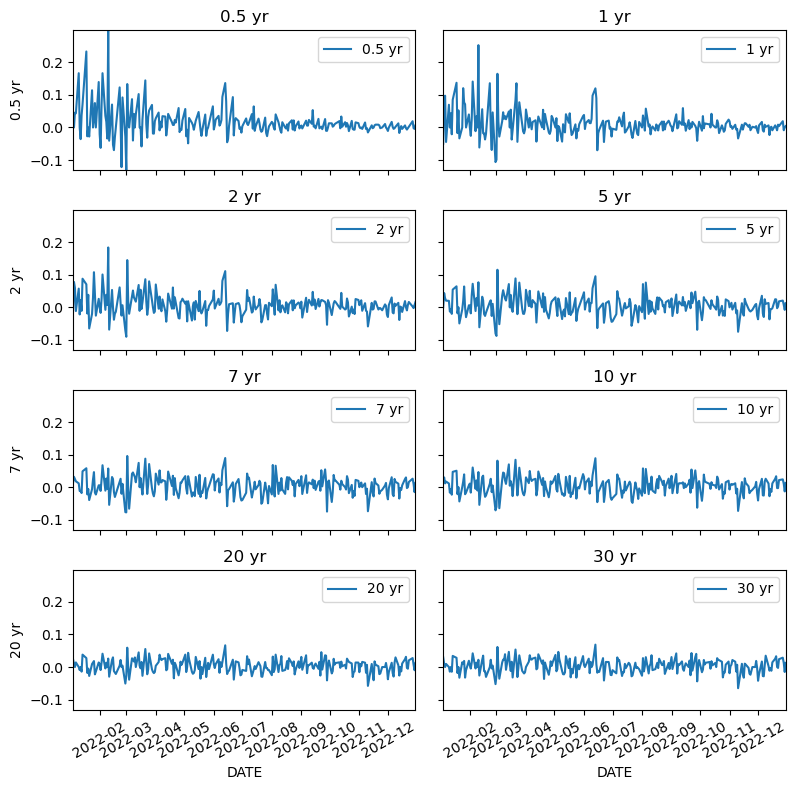

In [10]:
fig, axes = plt.subplots(4, 2, figsize=(8, 8), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten to 1D for easy iteration

# Plot each feature as a time series
for i, col in enumerate(X_df.columns):
    sns.lineplot(data=X_df[col],
                 markers=False,
                 dashes=False,
                 ax=axes[i])
    axes[i].set_title(col)  # Each subplot title is the column name
    axes[i].legend([col], loc='upper right', ncol=1)
    axes[i].set_ylim(y_min, y_max)
    axes[i].set_xlim(X_df.index[0], X_df.index[-1])
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()  # Adjust subplot layout

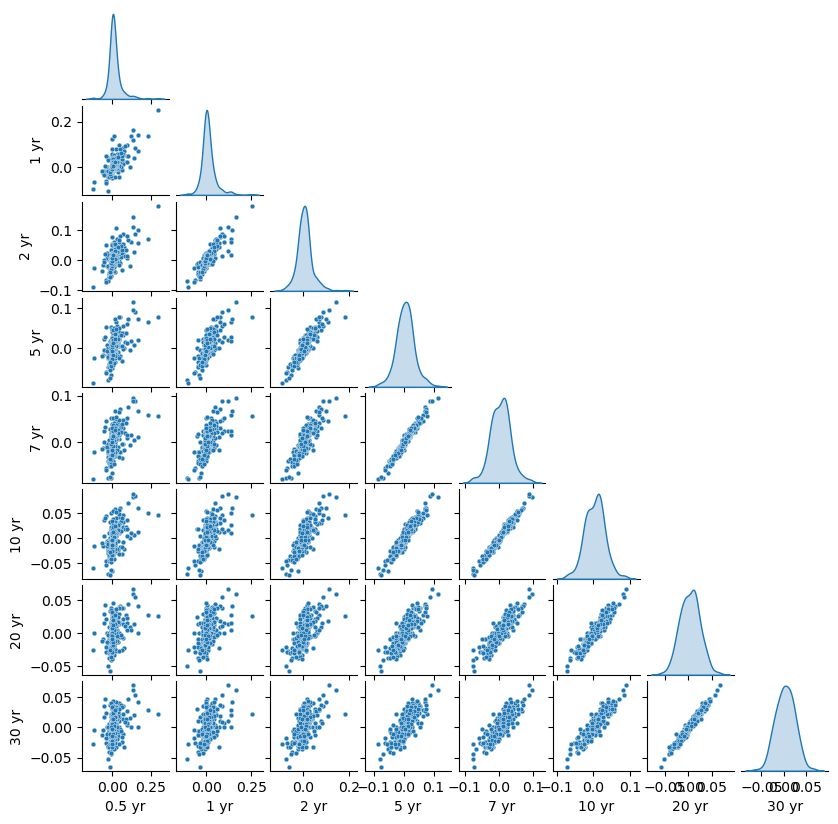

In [11]:
# Pairwise feature scatter plot
g = sns.pairplot(X_df, corner=True, diag_kind="kde", plot_kws={'s': 12})
g.fig.set_size_inches(8, 8)

## Data centering

In [13]:
mean = X_df.mean()
mean = np.array(mean).reshape(-1, 1)
mean

array([[0.01336972],
       [0.01074155],
       [0.00756404],
       [0.00477784],
       [0.00421179],
       [0.00387352],
       [0.00305352],
       [0.00297673]])

In [14]:
# Center each feature by subtracting its mean
X_df_c = X_df - X_df.mean()

## Covariance matrix

In [16]:
cov = X_df.cov()

<Axes: >

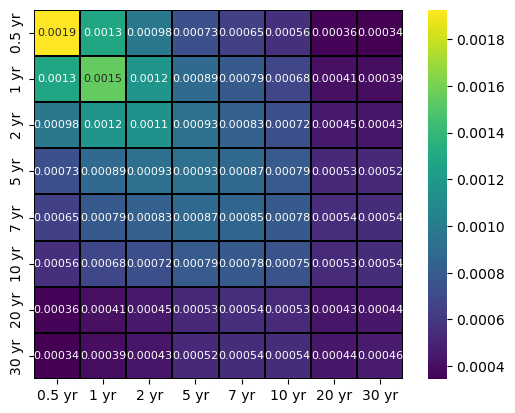

In [17]:
fig, ax = plt.subplots()
sns.heatmap(cov, ax=ax,
            annot=True,
            annot_kws={"size": 8},
            linecolor='k', linewidths='0.1',
            cmap='viridis',
            square=True)

## Standard deviation

In [19]:
D_sq = np.sqrt(np.diag(cov))
D_sq

array([0.04388477, 0.03930359, 0.03382721, 0.03043679, 0.02918109,
       0.02732218, 0.02083015, 0.02144493])

In [20]:
D_sq_df = X_df.std()
D_sq_df

0.5 yr    0.043885
1 yr      0.039304
2 yr      0.033827
5 yr      0.030437
7 yr      0.029181
10 yr     0.027322
20 yr     0.020830
30 yr     0.021445
dtype: float64

(0.02, 0.045)

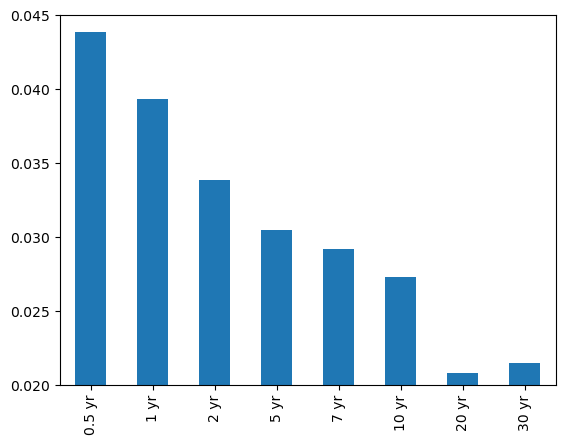

In [21]:
D_sq_df.plot(kind='bar')
plt.ylim(0.02, 0.045)

In [22]:
D = np.diag(D_sq)
D

array([[0.04388477, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.03930359, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.03382721, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.03043679, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.02918109,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02732218, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02083015, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02144493]])

## Standardization (Z-score normalization)

In [24]:
# Apply z-score normalization using D (diagonal matrix of std devs)
Z_df = (X_df - X_df.mean()) @ np.linalg.inv(D)

In [25]:
Z_df.columns = X_df.columns
Z_df

,0.5 yr,1 yr,2 yr,5 yr,7 yr,10 yr,20 yr,30 yr
DATE,,,,,,,,
2022-01-04,-0.304655,-1.545445,-0.602608,-0.156976,0.297845,0.531853,1.024319,1.253164
2022-01-05,-0.304655,1.735359,2.079924,1.281928,0.947029,0.960647,0.310621,0.311733
2022-01-06,0.731115,2.208944,1.557235,0.762044,0.701810,0.286302,-0.146591,-0.138808
2022-01-07,0.686082,-1.404096,-0.559540,0.513534,0.474982,0.492915,0.532758,0.307422
2022-01-10,3.493170,1.501794,1.475357,0.500124,0.261215,0.274141,-0.146591,-0.138808
...,...,...,...,...,...,...,...,...
2022-12-23,-0.255756,-0.163629,0.264444,0.449844,0.401059,0.656055,0.835656,0.986338
2022-12-27,0.134494,0.218091,-0.155019,0.523956,0.750413,0.736635,1.176919,1.203971
2022-12-28,-0.352527,-0.487554,-0.292039,0.093189,0.204459,0.239481,0.204682,0.454462


In [26]:
# Set unified y-axis for Z_df
y_min = Z_df.min().min()
y_max = Z_df.max().max()

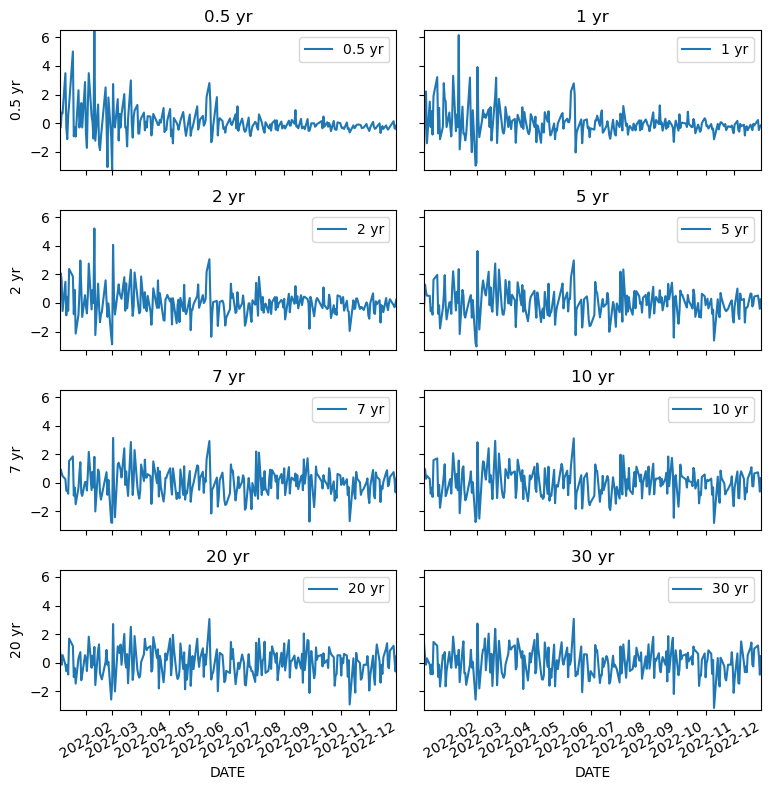

In [27]:
fig, axes = plt.subplots(4, 2, figsize=(8, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Plot each standardized feature
for i, col in enumerate(Z_df.columns):
    sns.lineplot(data=Z_df[col],
                 markers=False,
                 dashes=False,
                 ax=axes[i])
    axes[i].set_title(col)
    axes[i].legend([col], loc='upper right', ncol=1)
    axes[i].set_ylim(y_min, y_max)
    axes[i].set_xlim(Z_df.index[0], Z_df.index[-1])
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()

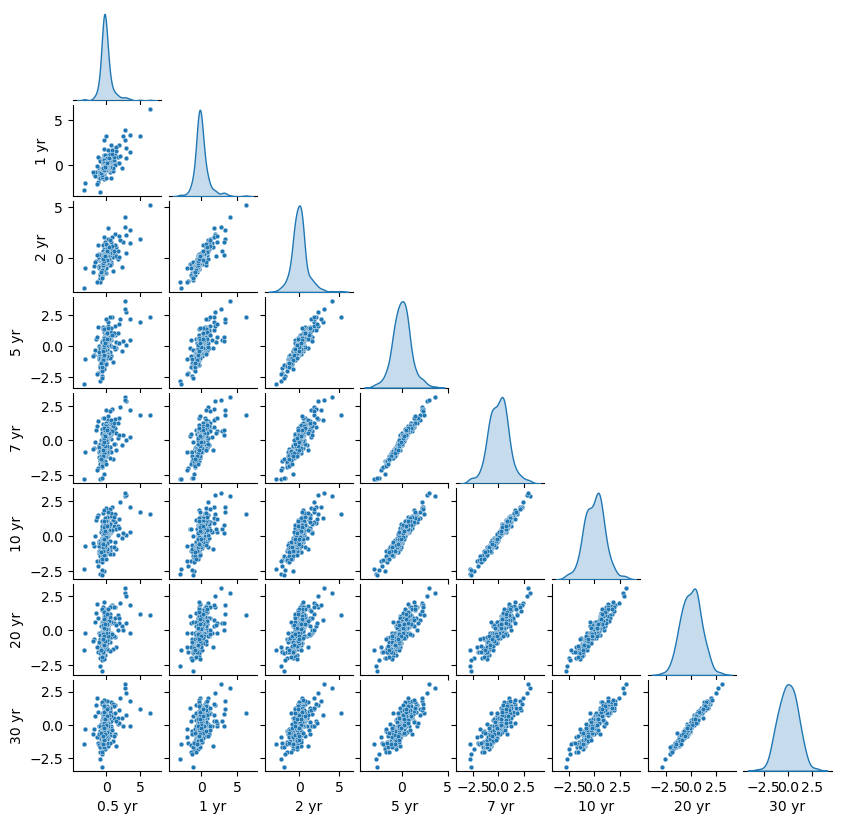

In [28]:
# Pairwise scatter plot after standardization
g = sns.pairplot(Z_df, corner=True, diag_kind="kde", plot_kws={'s': 12})
g.fig.set_size_inches(8, 8)

## Correlation matrix

In [30]:
P = X_df.corr()
P

,0.5 yr,1 yr,2 yr,5 yr,7 yr,10 yr,20 yr,30 yr
0.5 yr,1.000000,0.741326,0.658817,0.547214,0.508018,0.469002,0.395009,0.365413
1 yr,0.741326,1.000000,0.877098,0.741927,0.685748,0.633442,0.497752,0.466968
2 yr,0.658817,0.877098,1.000000,0.899742,0.838473,0.782254,0.637459,0.593849
5 yr,0.547214,0.741927,0.899742,1.000000,0.982671,0.951628,0.833816,0.793134
7 yr,0.508018,0.685748,0.838473,0.982671,1.000000,0.983504,0.894960,0.857845
10 yr,0.469002,0.633442,0.782254,0.951628,0.983504,1.000000,0.939536,0.915748
20 yr,0.395009,0.497752,0.637459,0.833816,0.894960,0.939536,1.000000,0.981736
30 yr,0.365413,0.466968,0.593849,0.793134,0.857845,0.915748,0.981736,1.000000


In [31]:
# Verify that correlation matrix equals Z.T @ Z / (n - 1)
n = len(Z_df)
Z_df.T @ Z_df / (n - 1)

,0.5 yr,1 yr,2 yr,5 yr,7 yr,10 yr,20 yr,30 yr
0.5 yr,1.000000,0.741326,0.658817,0.547214,0.508018,0.469002,0.395009,0.365413
1 yr,0.741326,1.000000,0.877098,0.741927,0.685748,0.633442,0.497752,0.466968
2 yr,0.658817,0.877098,1.000000,0.899742,0.838473,0.782254,0.637459,0.593849
5 yr,0.547214,0.741927,0.899742,1.000000,0.982671,0.951628,0.833816,0.793134
7 yr,0.508018,0.685748,0.838473,0.982671,1.000000,0.983504,0.894960,0.857845
10 yr,0.469002,0.633442,0.782254,0.951628,0.983504,1.000000,0.939536,0.915748
20 yr,0.395009,0.497752,0.637459,0.833816,0.894960,0.939536,1.000000,0.981736
30 yr,0.365413,0.466968,0.593849,0.793134,0.857845,0.915748,0.981736,1.000000


<Axes: >

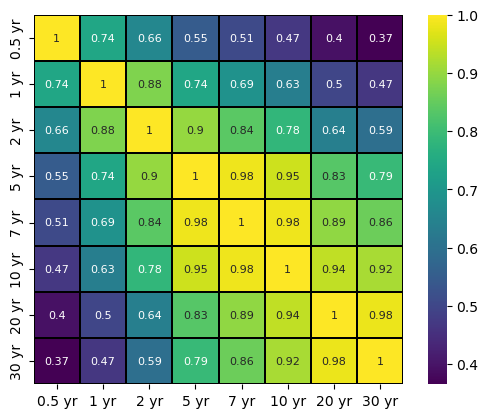

In [32]:
# Visualize the correlation matrix
fig, ax = plt.subplots()
sns.heatmap(P, ax=ax,
            annot=True,
            annot_kws={"size": 8},
            linecolor='k', linewidths='0.1',
            cmap='viridis',
            square=True)

## Eigen decomposition (Spectral decomposition)

In [34]:
lambdas, V = np.linalg.eig(P)

In [35]:
# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(-lambdas)
lambdas_sorted = lambdas[idx]

In [36]:
V = V[:, idx]

In [37]:
Lambda = np.diag(lambdas_sorted)

<Axes: >

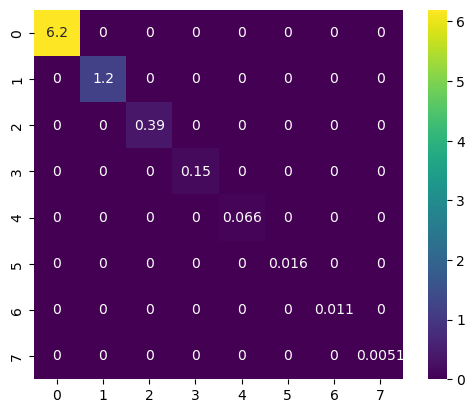

In [38]:
# Visualize the diagonal matrix of eigenvalues
fig, ax = plt.subplots()
sns.heatmap(Lambda, ax=ax,
            annot=True,
            cmap='viridis',
            square=True)

Text(0.5, 1.0, 'V.T')

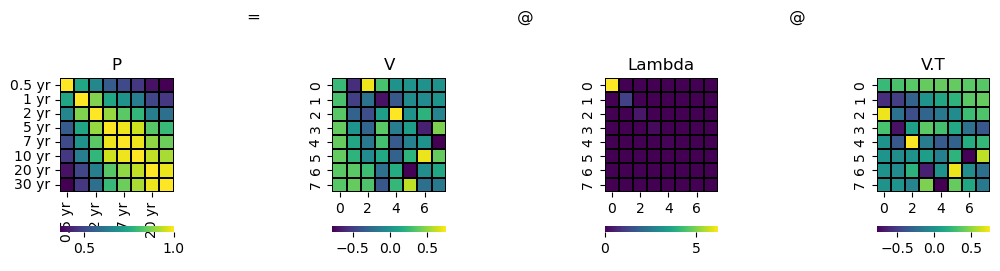

In [39]:
fig, axs = plt.subplots(1, 7, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(P, cmap='viridis',
                 linecolor='k', linewidths=0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('P')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(V, cmap='viridis',
                 linecolor='k', linewidths=0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('V')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(Lambda, cmap='viridis',
                 linecolor='k', linewidths=0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Lambda')

plt.sca(axs[5])
plt.title('@')
plt.axis('off')

plt.sca(axs[6])
ax = sns.heatmap(V.T, cmap='viridis',
                 linecolor='k', linewidths=0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('V.T')

In [40]:
lambdas_sorted

array([6.19819963e+00, 1.16487298e+00, 3.86438666e-01, 1.53121560e-01,
       6.55072070e-02, 1.55648171e-02, 1.11641690e-02, 5.13097110e-03])

## Data projection (Principal Components)

In [42]:
Y = Z_df @ V
Y

,0,1,2,3,4,5,6,7
DATE,,,,,,,,
2022-01-04,0.280490,2.120133,0.992302,0.385408,0.341954,0.096475,0.111479,-0.121303
2022-01-05,2.680390,-0.701660,-1.762888,-0.434904,0.283365,0.085417,0.138817,0.080526
2022-01-06,2.028260,-1.898829,-0.963545,-0.588416,-0.107884,0.007180,-0.017991,-0.169880
2022-01-07,0.405207,0.949265,0.998969,1.325394,-0.128117,-0.063829,-0.116009,0.109808
2022-01-10,2.204342,-3.167920,1.330348,0.528633,0.283518,0.115428,0.168594,0.048109
...,...,...,...,...,...,...,...,...
2022-12-23,1.206798,1.039372,0.074929,-0.093634,0.243919,0.090624,-0.002993,0.090335
2022-12-27,1.672576,1.026079,0.531691,-0.280451,-0.249498,-0.061103,-0.153695,-0.057867
2022-12-28,0.090713,0.857381,0.097397,0.131652,-0.053836,0.163691,-0.037097,-0.048182


## Explained variance ratio

In [44]:
variance_V = lambdas_sorted
variance_V

array([6.19819963e+00, 1.16487298e+00, 3.86438666e-01, 1.53121560e-01,
       6.55072070e-02, 1.55648171e-02, 1.11641690e-02, 5.13097110e-03])

In [45]:
# Compute explained variance ratio of each principal component
explained_var_ratio = variance_V / variance_V.sum()

In [46]:
PC_range = np.arange(len(variance_V)) + 1
labels = ['$PC_' + str(index) + '$' for index in PC_range]

(0.9, 8.1)

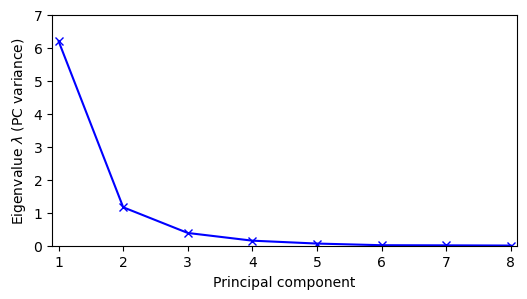

In [47]:
# Scree plot (eigenvalues)
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(PC_range, variance_V, 'b', marker='x')
ax.set_xlabel(r'Principal component')
ax.set_ylabel(r'Eigenvalue $\lambda$ (PC variance)')
ax.set_ylim(0, 7)
ax.set_xticks(PC_range)
ax.set_xlim(PC_range.min() - 0.1, PC_range.max() + 0.1)

Text(0.5, 0, 'Principal component')

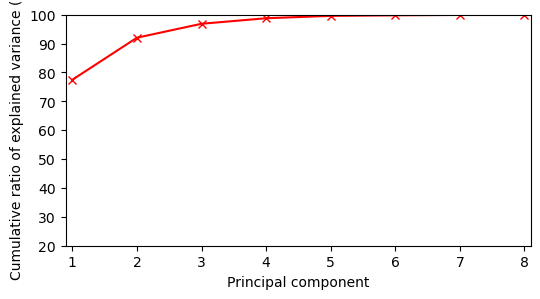

In [48]:
# Cumulative explained variance plot
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(PC_range, np.cumsum(explained_var_ratio) * 100,
         'r', marker='x')
ax.set_ylabel('Cumulative ratio of explained variance (%)')
ax.set_ylim(20, 100)
ax.set_xlim(PC_range.min() - 0.1, PC_range.max() + 0.1)
ax.set_xlabel('Principal component')

## Data reconstruction (Approximation of original data)

In [50]:
# Number of principal components to retain
num_p = 1  # Try changing to 2, 3, etc.

In [51]:
loadings = V[:, 0:num_p]

In [52]:
# Approximate reconstruction of standardized data
Z_df_hat = Y.iloc[:, :num_p] @ loadings.T

In [53]:
# Approximate reconstruction of original data
X_df_hat = Z_df_hat @ D + mean.T  # Scale and then shift back
X_df_hat.columns = X_df.columns
X_df_hat

,0.5 yr,1 yr,2 yr,5 yr,7 yr,10 yr,20 yr,30 yr
DATE,,,,,,,,
2022-01-04,0.016529,0.014238,0.010967,0.008106,0.007412,0.006842,0.005153,0.005068
2022-01-05,0.043557,0.044156,0.040084,0.036585,0.034795,0.032239,0.023118,0.022958
2022-01-06,0.036213,0.036027,0.032172,0.028846,0.027354,0.025338,0.018237,0.018097
2022-01-07,0.017933,0.015793,0.012480,0.009586,0.008835,0.008162,0.006087,0.005997
2022-01-10,0.038196,0.038222,0.034309,0.030936,0.029363,0.027201,0.019555,0.019410
...,...,...,...,...,...,...,...,...
2022-12-23,0.026961,0.025786,0.022206,0.019098,0.017981,0.016645,0.012087,0.011973
2022-12-27,0.032207,0.031593,0.027857,0.024625,0.023296,0.021574,0.015574,0.015445
2022-12-28,0.014391,0.011872,0.008665,0.005854,0.005247,0.004833,0.003733,0.003653


## Compare original and reconstructed data

In [55]:
# Set y-axis limits based on original data
y_min = X_df.min().min()
y_max = X_df.max().max()

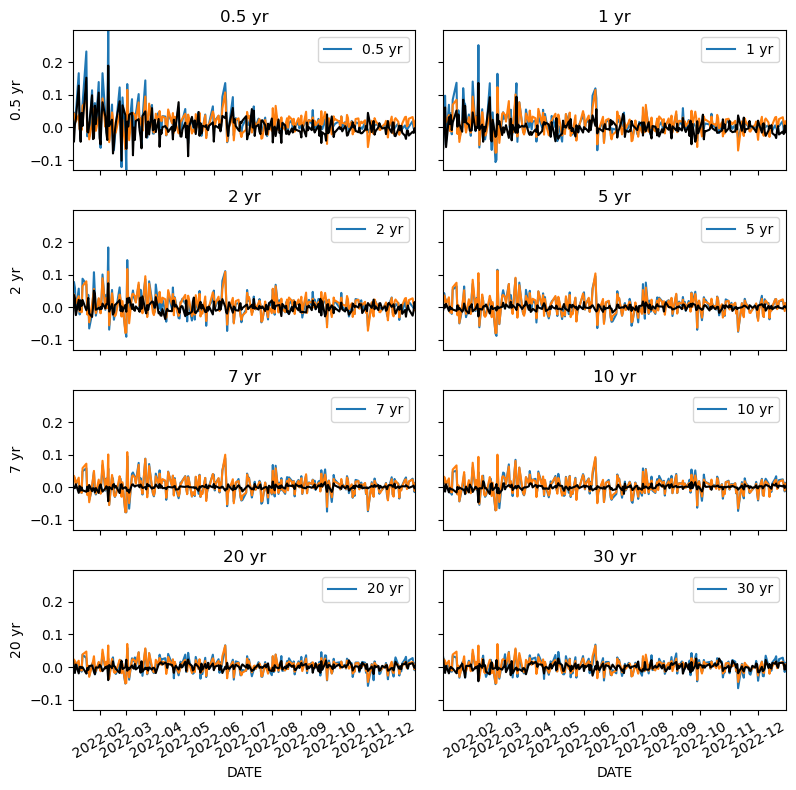

In [56]:
fig, axes = plt.subplots(4, 2, figsize=(8, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Plot original vs reconstructed vs reconstruction error
for i, col in enumerate(X_df.columns):
    sns.lineplot(data=X_df[col],
                 markers=False,
                 dashes=False,
                 ax=axes[i])
    sns.lineplot(data=X_df_hat[col],
                 markers=False,
                 dashes=False,
                 ax=axes[i])
    sns.lineplot(X_df[col] - X_df_hat[col],
                 c='k', ax=axes[i])

    axes[i].set_title(col)
    axes[i].legend([col], loc='upper right', ncol=1)
    axes[i].set_ylim(y_min, y_max)
    axes[i].set_xlim(X_df_hat.index[0], X_df_hat.index[-1])
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()

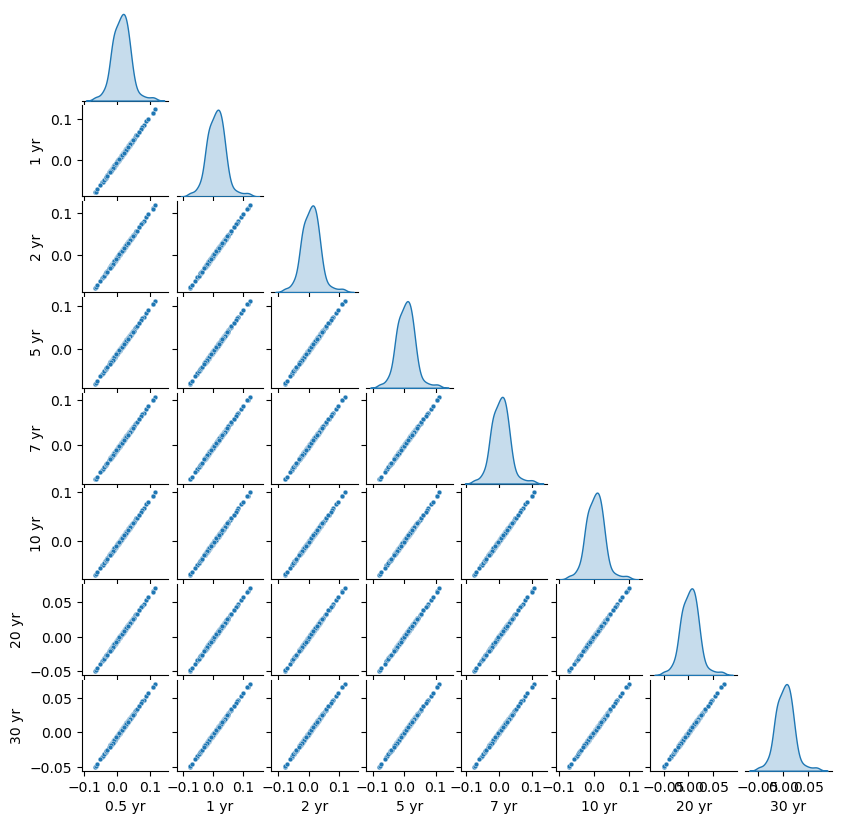

In [57]:
# Pairwise scatter plots for reconstructed data
g = sns.pairplot(X_df_hat, corner=True, diag_kind="kde", plot_kws={'s': 12})
g.fig.set_size_inches(8, 8)

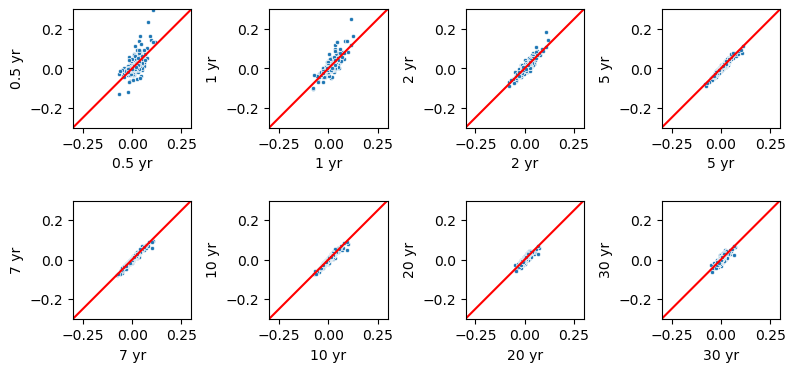

In [58]:
# Scatter plots comparing reconstructed vs original features
fig, axes = plt.subplots(2, 4, figsize=(8, 4))
axes = axes.flatten()

for col_idx, ax_idx in zip(list(X_df_hat.columns), axes):
    sns.scatterplot(x=X_df_hat[col_idx],
                    y=X_df[col_idx],
                    marker='.',
                    ax=ax_idx)
    ax_idx.plot([-0.3, 0.3], [-0.3, 0.3], c='r')
    ax_idx.set_aspect('equal', adjustable='box')
    ax_idx.set_xlim(-0.3, 0.3)
    ax_idx.set_ylim(-0.3, 0.3)

plt.tight_layout()